In [1]:
import pandas as pd

In [2]:
annotations_raw = pd.read_csv('./annotations_raw.csv', header=None)
tweets_raw = pd.read_csv('./tweets_raw.csv')
annotations_by_tweet_raw = pd.read_csv('./annotations_by_tweet_raw.csv')

In [3]:
annotations_by_tweet_raw

,id,text,account_id,x,1,2,3,4,5
0,21687865379,¿Cómo se llama la maestra de los pollitos? ¡Mi...,174450359,0,7,0,2,1,0
1,21687932514,¿Qué es una elección? Lo que le pasa a un chin...,174450359,1,1,2,0,3,1
2,27561052090,"Si tu apellido fuera Melculo, ¿cómo te gustarí...",174450359,0,1,0,3,2,1
3,2057672085995520,Las piernas son las mejores amigas de una chic...,174450359,0,1,1,1,1,1
4,2100110548795392,¿Cuál es la diferencia entre un burro y una TV...,174450359,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
15129,497835428242665472,Windows 9 también eliminaría la barra de opcio...,177694647,1,0,0,0,0,0
15130,497874858735587328,"Bañarse sin música, es como no bañarse.",1518218509,1,0,0,0,0,0
15131,498640871722856448,RT @MichelPesquera: Mi consejo del día... ¡Bue...,1518218509,1,0,0,0,0,0
15132,498640875581632512,RT @MichelPesquera: Las palabras que usamos pa...,1518218509,2,0,0,0,0,0


In [4]:
annotations_by_tweet_raw = annotations_by_tweet_raw.loc[:, ['id', 'text']]
annotations_by_tweet_raw.columns = ['text_id', 'text']
annotations_by_tweet_raw.to_csv('data.csv', index=False)

In [5]:
annotations_raw.columns = ['text_id', 'annotator_id', 'label']
annotations_raw['annotator_id'] = annotations_raw['annotator_id'].astype('category').cat.codes


In [6]:
#annotations_raw.to_csv('annotations.csv', index=False)
annotations_df = annotations_raw[annotations_raw.label.isin(['x', '1', '2','3','4','5'])].copy()
annotations_df['label'] = annotations_df['label'].apply(lambda x: 0 if x == 'x' else int(x))
annotations_df.columns = ['text_id', 'annotator_id', 'is_funny']
annotations_df.to_csv('annotations.csv', index=False)
#.to_csv('annotations.csv', index=False)

In [7]:
annotations_df

,text_id,annotator_id,is_funny
1,21687865379,160,3
2,21687865379,276,1
3,21687865379,2845,4
4,21687865379,3007,1
5,21687865379,4770,1
...,...,...,...
40424,498640871722856448,2101,0
40425,498640875581632512,160,0
40427,498640875581632512,3316,0
40428,498642160540200960,3032,0


<AxesSubplot:>

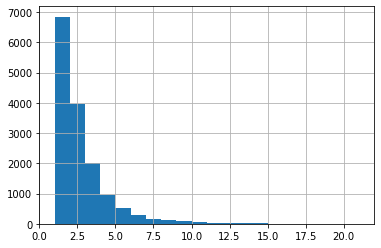

In [8]:
annotations_df.text_id.value_counts().hist(bins=20)

<AxesSubplot:>

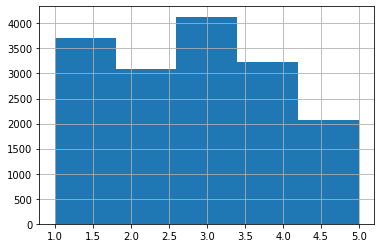

In [9]:
annotations_df[annotations_df.is_funny > 0].is_funny.hist(bins=5)

<AxesSubplot:>

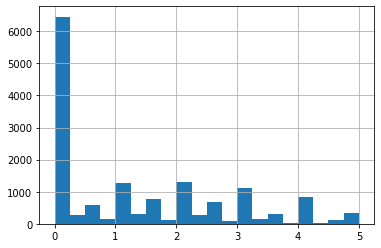

In [10]:
annotations_df.groupby('text_id')['is_funny'].mean().hist(bins=20)

(0.0, 100.0)

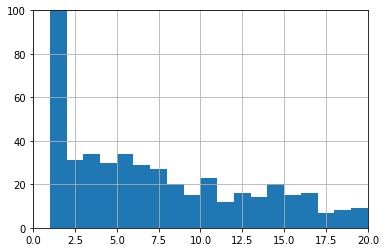

In [24]:
import matplotlib.pyplot as plt
annotations_df.annotator_id.value_counts().hist(bins=2412)
plt.xlim(0, 20)
plt.ylim(0, 100)